# Model (scikit-learn)


In this tutorial, we will build a model with the Python [`scikit-learn`](https://scikit-learn.org/stable/) module. Additionally, you will learn how to create a data preprocessing pipline.

# Data preparation

See notebook `10a-application-model-data-exploration.ipynb` for details about data preprocessing and data exploration.

In [7]:
import pandas as pd

ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "duke-forest.csv"
df = pd.read_csv(ROOT + DATA)

# Drop irrelevant features
df = df.drop(['url', 'address', 'type'], axis=1)

# Convert data types
df['heating'] = df['heating'].astype("category")
df['cooling'] = df['cooling'].astype("category")
df['parking'] = df['parking'].astype("category")

# drop column with too many missing values
df = df.drop(['hoa'], axis=1)

## Data preprocessing pipeline

In [8]:
# Modules
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [9]:
# for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

In [10]:
# for categorical features  
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

In [11]:
# Pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="category")),
    ('cat', categorical_transformer, selector(dtype_include="category"))
        ])

# Simple regression

In [13]:
# Select features for simple regression
features = ['area']
X = df[features]

# Create response
y = df["price"]

In [16]:
# check feature
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    98 non-null     int64
dtypes: int64(1)
memory usage: 912.0 bytes


In [19]:
# check label
y

0     1520000
1     1030000
2      420000
3      680000
4      428500
       ...   
93     541000
94     473000
95     490000
96     815000
97     674500
Name: price, Length: 98, dtype: int64

In [18]:
# check for missing values
print("Missing values X:",X.isnull().any(axis=1).sum())

print("Missing values Y:",y.isnull().sum())

Missing values X: 0
Missing values Y: 0


## Data splitting

In [20]:
from sklearn.model_selection import train_test_split

# Train Test Split
# Use random_state to make this notebook's output identical at every run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [21]:
from sklearn.linear_model import LinearRegression

# Create pipeline with model
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
                        ])

In [22]:
# Fit model
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc0e9819910>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
          

In [23]:
# Obtain model coefficients
lm_pipe.named_steps['lm'].coef_

array([155120.6689059])

## Evaluation with training data

There are various options to evaluate a model in scikit-learn. Review this overview about [metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [24]:
X_train.head()

,area
49,2902
70,2637
68,1661
15,2750
39,2334


In [25]:
y_pred = lm_pipe.predict(X_train)

In [28]:
y_pred

array([ 587175.78697063,  539300.9370662 ,  362976.96156915,
        559715.49570469,  484561.01434529,  481489.79755897,
        455474.78478072,  771810.11377184,  513105.26447699,
        636495.91536273,  557908.89759509,  576697.51793494,
        426930.53464902,  460894.57910952,  415187.64693662,
        586633.80753775,  260542.84875478, 1179017.32767589,
        647154.84420938,  613371.45955984,  659078.39173274,
        576155.53850206,  376165.12776924,  412477.74977222,
        499013.7992221 ,  650045.40118474,  692861.77638228,
        265240.00383974,  765487.02038824,  574168.2805815 ,
        440660.68028199,  592776.24111039,  447164.43347655,
        771810.11377184,  720502.72745917,  769100.21660744,
        470469.54909041,  460894.57910952,  534242.46235932,
        549417.88647997,  743265.86364015,  488174.21056449,
        504794.91317282,  427111.19445998,  461255.89873144,
        846061.29607644,  501001.05714266,  573626.30114862,
        599821.97373783,

In [29]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred)  

0.5560009346032928

In [30]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred)

19215242600.426193

In [31]:
# RMSE
mean_squared_error(y_train, y_pred, squared=False)

138619.0556901402

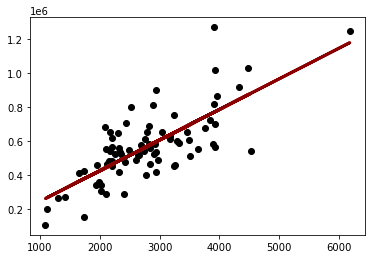

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt

# Plot with matplotlib
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, y_pred, color='darkred', linewidth=3);

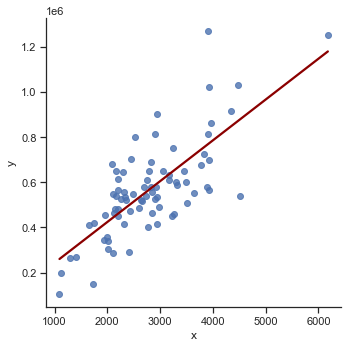

In [33]:
import seaborn as sns 
sns.set_theme(style="ticks")

# Plot with Seaborn

# We first need to create a DataFrame
df_train = pd.DataFrame({'x': X_train['area'], 'y':y_train})

sns.lmplot(x='x', y='y', data=df_train, line_kws={'color': 'darkred'}, ci=False);

In [195]:
import plotly.express as px

# Plot with Plotly Express
px.scatter(x=X_train['area'], y=y_train, opacity=0.65, 
                trendline='ols', trendline_color_override='darkred')

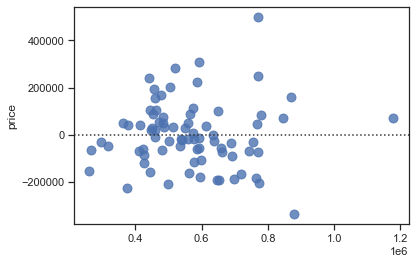

In [196]:
sns.residplot(x=y_pred, y=y_train, scatter_kws={"s": 80});

## Evaluation with test data

In [198]:
y_pred = lm_pipe.predict(X_test)

In [199]:
print('MSE:', mean_squared_error(y_test, y_pred))

print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

MSE: 63888283048.62581
RMSE: 252761.31636115882


In [200]:
# Plot with Plotly Express
px.scatter(x=X_test['area'], y=y_test, opacity=0.65, 
                trendline='ols', trendline_color_override='darkred')

Model generalization on unseen data (see [plotly documentation](https://plotly.com/python/ml-regression/))


In [201]:
import numpy as np
import plotly.graph_objects as go

x_range = pd.DataFrame({ 'area': np.linspace(X_train['area'].min(), X_train['area'].max(), 100)})
y_range =  lm_pipe.predict(x_range)

go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range.area, y=y_range, name='prediction')
])


# Multiple regression

In [96]:
# Select features for multiple regression
features= [
 'bed',
 'bath',
 'area',
 'year_built',
 'cooling',
 'lot'
  ]
X = df[features]

X.info()
print("Missing values:",X.isnull().any(axis = 1).sum())

# Create response
y = df["price"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   bed         98 non-null     int64   
 1   bath        98 non-null     float64 
 2   area        98 non-null     int64   
 3   year_built  98 non-null     int64   
 4   cooling     98 non-null     category
 5   lot         97 non-null     float64 
dtypes: category(1), float64(2), int64(3)
memory usage: 4.1 KB
Missing values: 1


In [97]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Create pipeline with model
lm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lm', LinearRegression())
                        ])

# Fit model
lm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb30edc7450>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
          

In [99]:
# Obtain model coefficients
lm_pipe.named_steps['lm'].coef_

array([  2447.57967471,  50670.93485383,  86499.75206383,  20145.48540648,
        64856.29369518,  25401.84101108, -25401.84101108])

In [100]:
y_pred = lm_pipe.predict(X_train)

In [101]:
r2_score(y_train, y_pred)

0.6936772829350181